# load data

In [1]:
import pandas as pd
import numpy as np

titanic = pd.read_csv('http://biostat.mc.vanderbilt.edu/wiki/pub/Main/DataSets/titanic.txt')
print(titanic.info())
titanic.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1313 entries, 0 to 1312
Data columns (total 11 columns):
row.names    1313 non-null int64
pclass       1313 non-null object
survived     1313 non-null int64
name         1313 non-null object
age          633 non-null float64
embarked     821 non-null object
home.dest    754 non-null object
room         77 non-null object
ticket       69 non-null object
boat         347 non-null object
sex          1313 non-null object
dtypes: float64(1), int64(2), object(8)
memory usage: 113.0+ KB
None


,row.names,pclass,survived,name,age,embarked,home.dest,room,ticket,boat,sex
0,1,1st,1,"Allen, Miss Elisabeth Walton",29.0000,Southampton,"St Louis, MO",B-5,24160 L221,2,female
1,2,1st,0,"Allison, Miss Helen Loraine",2.0000,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,NaN,female
2,3,1st,0,"Allison, Mr Hudson Joshua Creighton",30.0000,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,(135),male
3,4,1st,0,"Allison, Mrs Hudson J.C. (Bessie Waldo Daniels)",25.0000,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,NaN,female
4,5,1st,1,"Allison, Master Hudson Trevor",0.9167,Southampton,"Montreal, PQ / Chesterville, ON",C22,NaN,11,male


# preprocess data

In [2]:
# drop redundant data
X = titanic.drop(['row.names', 'name', 'survived'], axis=1)
y = titanic['survived']

In [3]:
# fillna
X['age'].fillna(X['age'].mean(), inplace=True)
X.fillna('UNKNOWN', inplace=True)

In [4]:
# split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=33)

In [5]:
# vectorize
from sklearn.feature_extraction import DictVectorizer

vec = DictVectorizer()
X_train = vec.fit_transform(X_train.to_dict(orient='record'))
X_test = vec.transform(X_test.to_dict(orient='record'))

In [6]:
X_train.toarray()

array([[31.19418104,  0.        ,  0.        , ...,  0.        ,
         0.        ,  1.        ],
       [31.19418104,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [31.19418104,  0.        ,  0.        , ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [12.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  1.        ],
       [18.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  1.        ],
       [31.19418104,  0.        ,  0.        , ...,  0.        ,
         0.        ,  1.        ]])

# learn data

In [7]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(criterion='entropy')
dt.fit(X_train, y_train)
dt.score(X_test, y_test)

0.8085106382978723

In [9]:
# feature selection
from sklearn import feature_selection

fs = feature_selection.SelectPercentile(feature_selection.chi2, percentile=20)

X_train_fs = fs.fit_transform(X_train, y_train)
dt.fit(X_train_fs, y_train)
X_test_fs = fs.transform(X_test)
dt.score(X_test_fs, y_test)

0.8115501519756839

# predict data and feature selection again

In [24]:
from sklearn.model_selection import cross_val_score
percentiles = range(1, 100, 2)

results = []
for i in percentiles:
    fs = feature_selection.SelectPercentile(feature_selection.chi2, percentile=i)
    X_train_fs = fs.fit_transform(X_train, y_train)
    scores = cross_val_score(dt, X_train_fs, y_train, cv=5)
    results = np.append(results, scores.mean())
print(results)

opt = np.where(results == results.max())[0]
print('Optimal number of features %d' % percentiles[int(opt)])

[0.85064229 0.85673884 0.87502849 0.88621154 0.86281467 0.87093132
 0.87194137 0.873977   0.86688076 0.86789081 0.86788563 0.86586035
 0.86890604 0.86585517 0.86483995 0.86179426 0.86789599 0.86179944
 0.86688076 0.86280949 0.86586035 0.85975862 0.86890604 0.86585517
 0.86789599 0.86788563 0.86891122 0.86789599 0.86687558 0.87094686
 0.86892158 0.86790117 0.87196726 0.8709365  0.86790117 0.87094168
 0.86891122 0.87195172 0.8719569  0.87297213 0.86688076 0.86789599
 0.86383508 0.86485031 0.86486067 0.86281985 0.86078421 0.85975862
 0.85977934 0.86281985]
Optimal number of features 7


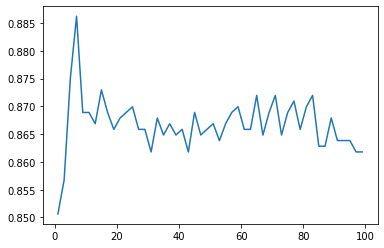

In [12]:
import pylab as pl
pl.plot(percentiles, results)
pl.show()

In [25]:
from sklearn import feature_selection

fs = feature_selection.SelectPercentile(feature_selection.chi2, percentile=7)

X_train_fs = fs.fit_transform(X_train, y_train)
dt.fit(X_train_fs, y_train)
X_test_fs = fs.transform(X_test)
dt.score(X_test_fs, y_test)

0.8571428571428571